### АНАЛИЗ БИЗНЕС ПОКАЗАТЕЛЕЙ. 





#### Описание и задачи проекта.

Маркетинговый анализ развлекательного приложения Procrastinate Pro+. 
Привлечение пользователей приносит убытки при значительных вложениях. Необходимо установить причины убыточности данного проекта, дать рекомендации отделу маркетинга для повышения окупаемости.


Описание данных
Таблица visits_log_short (лог сервера с информацией о посещениях сайта):

- User Id — уникальный идентификатор пользователя
- Device — категория устройства пользователя
- Session start — дата и время начала сессии
- Session End — дата и время окончания сессии
- Channel — идентификатор рекламного источника, из которого пришел пользователь
- Region - страна пользователя

Таблица orders_log_short (информация о заказах):

- User Id — уникальный id пользователя, который сделал заказ
- Event Dt — дата и время покупки
- Revenue — выручка

Таблица costs_short (информация о затратах на маркетинг):

- Channel — идентификатор рекламного источника
- Dt — дата
- Costs — затраты на этот рекламный источник в этот день





#### Изучение данных и подготовка их к анализу.

- изучение данных
- предобработка данных

#### Составление функций для расчета и анализа LTV, ROI, удержания и конверсии

- функция для создания пользовательских профилей
- функция для расчёта удержания
- функция для расчёта конверсии
- функция для расчёта LTV и ROI
- функция для сглаживания фрейма
- функция для визуализации удержания
- функция для визуализации конверсии
- функция для визуализации LTV, ROI





#### Исследовательский анализ данных

- Построение профилей пользователей. Определение минимальной и максимальной даты привлечения пользователей
- Определение момента и горизонта анализа данных
- Определение стран, которые дают больше всего платящих пользователей
- Определение, с каких устройств чаще всего заходят платящие пользователи
- Определение, какие каналы приносят больше всего платящих пользователей

#### Маркетинг

- Расчет и визуализация суммарных расходов по рекламным каналам привлечения пользователей
- Расчет и визуализация САС по каналам привлечения

#### Оценка окупаемости рекламы для привлечения пользователей

- Анализ общей окупаемости рекламы
- Анализ окупаемости рекламы с разбивкой по устройствам
- Анализ окупаемости рекламы с разбивкой по странам
- Анализ окупаемости рекламы с разбивкой по рекламным каналам
- 

#### ВЫВОДЫ

### Шаг 1. Загрузка данных и подготовка их к анализу


In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline
pd.set_option('display.max_columns', 500)
pd.options.mode.chained_assignment = None
from datetime import datetime, timedelta
pd.set_option('display.float_format', '{:,.2f}'.format)

In [2]:
visits = pd.read_csv('/datasets/.......csv')
orders = pd.read_csv('/datasets/........csv')
costs = pd.read_csv('/datasets/.........csv')
events = None

In [3]:
# построим функцию, которая принимает на вход датафрейм df и выводит результат методов sample(5), info(), describe(), 
# а также количество полных дубликатов
def df_info(df):
    display(df.sample(5))
    display(df.info())
    display(df.describe())
    display('Дубликатов:', df.duplicated().sum())

In [4]:
# изучим таблицу с информацией о посещениях сайта
df_info(visits)

,User Id,Region,Device,Channel,Session Start,Session End
300538,75086777119,UK,PC,LeapBob,2019-10-15 09:03:16,2019-10-15 09:08:30
104363,379093307331,United States,iPhone,RocketSuperAds,2019-08-11 00:37:15,2019-08-11 01:07:34
70737,520898993531,United States,Android,organic,2019-07-09 12:41:37,2019-07-09 13:30:07
77625,160967009613,United States,Mac,FaceBoom,2019-07-16 19:02:06,2019-07-16 20:39:09
44160,750650056971,United States,iPhone,FaceBoom,2019-06-16 08:56:49,2019-06-16 09:56:15


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

,User Id
count,"309,901.00"
mean,"499,766,449,382.70"
std,"288,789,916,887.83"
min,"599,326.00"
25%,"249,369,122,776.00"
50%,"498,990,589,687.00"
75%,"749,521,111,616.00"
max,"999,999,563,947.00"


'Дубликатов:'

0

#### Вывод по изучению данных о посещениях сайта
1. Некорректные названия столбцов
2.Тип данных Session Start и Session End должен быть datetime, а не object
3. Пропусков и дубликатов нет.

In [5]:
# изучим таблицу с информацией о заказах
df_info(orders)

,User Id,Event Dt,Revenue
1735,433766957658,2019-05-28 00:38:38,4.99
22668,266720452589,2019-10-07 12:04:57,4.99
25306,362854141315,2019-10-19 07:15:45,5.99
17174,699867304993,2019-09-10 13:47:28,4.99
3314,711604093278,2019-06-12 09:18:17,4.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None

,User Id,Revenue
count,"40,212.00","40,212.00"
mean,"499,029,531,203.23",5.37
std,"286,093,675,967.17",3.45
min,"599,326.00",4.99
25%,"251,132,440,436.75",4.99
50%,"498,283,972,665.00",4.99
75%,"743,332,711,780.00",4.99
max,"999,895,427,370.00",49.99


'Дубликатов:'

0

#### Вывод по изучению данных о заказах

1. Некорректные названия столбцов, нужно изменить
2. Тип данных Event Dt должен быть datetime, а не object
3. Пропусков и дубликатов нет.

In [6]:
# изучим таблицу с информацией о затратах на маркетинг
df_info(costs)

,dt,Channel,costs
374,2019-05-15,RocketSuperAds,15.21
531,2019-10-19,RocketSuperAds,8.12
901,2019-05-02,AdNonSense,34.65
55,2019-06-25,FaceBoom,217.80
1473,2019-06-03,WahooNetBanner,28.80


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

,costs
count,"1,800.00"
mean,58.61
std,107.74
min,0.80
25%,6.50
50%,12.29
75%,33.60
max,630.00


'Дубликатов:'

0

#### Вывод по изучению данных о затратах на маркетинг
1. Некорректное название столбцов.
2. Тип данных dt должен быть datetime, а не object. Нужно изменить.
3. Распределение затрат скошено вправо. Большое стандартное отклонение говорит о существенном разбросе значений.
4. Пропущенных значений и дубликатов нет.



#### Предобработка данных

In [7]:
# Скорректируем названия столбцов 
visits.columns = visits.columns.str.replace(' ', '_')
visits.columns = visits.columns.str.lower()

orders.columns = orders.columns.str.replace(' ', '_')
orders.columns = orders.columns.str.lower()

costs.columns = costs.columns.str.lower()

display(visits.sample(5))
display(orders.sample(5))
display(costs.sample(5))

,user_id,region,device,channel,session_start,session_end
15146,545088264554,United States,iPhone,FaceBoom,2019-05-17 22:08:36,2019-05-17 22:08:48
79151,796060593633,United States,iPhone,RocketSuperAds,2019-07-18 03:05:57,2019-07-18 03:33:48
119912,291264018280,United States,Android,MediaTornado,2019-08-24 12:44:13,2019-08-24 12:44:24
9254,900653647097,United States,iPhone,RocketSuperAds,2019-05-11 23:33:56,2019-05-12 00:37:18
301361,154961870528,France,PC,organic,2019-10-16 16:17:45,2019-10-16 16:27:45


,user_id,event_dt,revenue
21660,537218478715,2019-10-02 13:28:53,4.99
1664,368878859551,2019-05-27 20:40:12,4.99
13380,334429105693,2019-08-19 03:40:30,4.99
3113,555317348307,2019-06-11 13:32:26,4.99
12633,199216021240,2019-08-15 17:17:05,4.99


,dt,channel,costs
795,2019-07-15,YRabbit,1.26
1521,2019-07-21,WahooNetBanner,26.40
1750,2019-09-08,lambdaMediaAds,11.20
400,2019-06-10,RocketSuperAds,12.29
1569,2019-09-07,WahooNetBanner,28.20


In [8]:
# произведем замену типа данных на datetime в тех полях, в которых были некорректные типы данных (описывали выше)
# и проверим

visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

display(visits.info())
display(orders.info())
display(costs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

#### Шаг 2. Зададим функции для расчета и анализа LTV, ROI, удержания и конверсии



In [9]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, events, ad_costs, event_names=[]):
    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles
 

In [10]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [11]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 


In [12]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

#### Зададим функции для визуализации вышеуказанных метрик — filter_data(), plot_retention(), plot_conversion() и plot_ltv_roi()

In [13]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [14]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [15]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [16]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

### Проведение исследовательского анализа данных



#### Построение профилей пользователей. Определение минимальной и максимальной даты привлечения пользователей

In [17]:
# получаем профили пользователей
profiles = get_profiles(visits, orders, events, costs)
display(profiles.head(5)) 

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.09
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.11
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.00
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.99
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.23


In [18]:
display('Минимальная дата привлечения пользователей', profiles['dt'].min())
display('Максимальная дата привлечения пользователей', profiles['dt'].max())

'Минимальная дата привлечения пользователей'

datetime.date(2019, 5, 1)

'Максимальная дата привлечения пользователей'

datetime.date(2019, 10, 27)

#### Установим момент и горизонт анализа данных

In [19]:
# момент анализа и горизонт берем из условий задач проекта
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа 

#### Определяем страны, которые дают больше всего платящих пользователей

In [20]:
region_payer = profiles.groupby('region').agg({'user_id': 'nunique', 'payer':['sum', 'mean']}) #определяем долю платящих пользователей по регионам
region_payer.columns = ['Пользователи', 'Платящие пользователи', '% платящих'] # переименуем поля для удобства
region_payer['% платящих'] = region_payer['% платящих']*100 #переведем в проценты для удобства визуализации
region_payer = region_payer.sort_values(by='% платящих', ascending=False).reset_index() # отсортируем по доле платящих в порядке убывания
display(region_payer)

,region,Пользователи,Платящие пользователи,% платящих
0,United States,100002,6902,6.90
1,Germany,14981,616,4.11
2,UK,17575,700,3.98
3,France,17450,663,3.80


Итак, пользователи сгруппированы по следующим странам: США, Германия, Великобритания, Франция. Самая большая доля платящих пользователей приходит из США - 6,9 %, и далее по убыванию с очень незначительным разрывом: Германия - 4,11 %, Великобритания - 3,98%. Меньшую долю платящих пользователей составляет Франция - 3,8%.

#### Определяем, с каких устройств чаще всего заходят платящие пользователи

In [21]:
# посчитаем долю платящих пользователей по использованию устройств, отсортируем по убыванию
device_payer = profiles.groupby('device').agg({'user_id': 'nunique', 'payer':['sum', 'mean']})
device_payer.columns = ['Пользователи', 'Платящие пользователи', '% платящих']
device_payer['% платящих'] = device_payer['% платящих']*100
device_payer = device_payer.sort_values(by='% платящих', ascending=False).reset_index()
display(device_payer)

,device,Пользователи,Платящие пользователи,% платящих
0,Mac,30042,1912,6.36
1,iPhone,54479,3382,6.21
2,Android,35032,2050,5.85
3,PC,30455,1537,5.05


Пользователи пользуются следующими устройствами: Mac, iPhone, Android, PC. Чаще всего пользователи заходят с устройств Mac - 6,36 % и iPhone - 6,21 %. Пользователи с других устройств заходят меньше, но незначительно: Android - 5,85 %, PC - 5,05 %.

#### Определяем, какие каналы приносят больше всего платящих пользователей

In [22]:
# посчитаем долю платящих пользователей в зависимости от канала, отсортируем по убыванию
channel_payer = profiles.groupby('channel').agg({'user_id': 'nunique', 'payer':['sum', 'mean']})
channel_payer.columns = ['Пользователи', 'Платящие пользователи', '% платящих']
channel_payer['% платящих'] = channel_payer['% платящих']*100
channel_payer = channel_payer.sort_values(by='% платящих', ascending=False).reset_index()
display(channel_payer)

,channel,Пользователи,Платящие пользователи,% платящих
0,FaceBoom,29144,3557,12.20
1,AdNonSense,3880,440,11.34
2,lambdaMediaAds,2149,225,10.47
3,TipTop,19561,1878,9.60
4,RocketSuperAds,4448,352,7.91
5,WahooNetBanner,8553,453,5.30
6,YRabbit,4312,165,3.83
7,MediaTornado,4364,156,3.57
8,LeapBob,8553,262,3.06
9,OppleCreativeMedia,8605,233,2.71


Привлечение пользователей шло по следующим рекламным каналам: FaceBoom, AdNonSense, lambdaMediaAds, TipTop, RocketSuperAds, WahooNetBanner, YRabbit, MediaTornado, LeapBob, OppleCreativeMedia. Больше всего платящих пользователей привлекла следующая пятерка рекламных каналов: FaceBoom - 12,2 %, AdNonSense - 11,34 %, lambdaMediaAds - 10,47 %, TipTop - 9,6 %, RocketSuperAds - 7,91 %. 

### Маркетинг



#### Расчет и визуализация суммарных расходов по рекламным каналам привлечения пользователей.

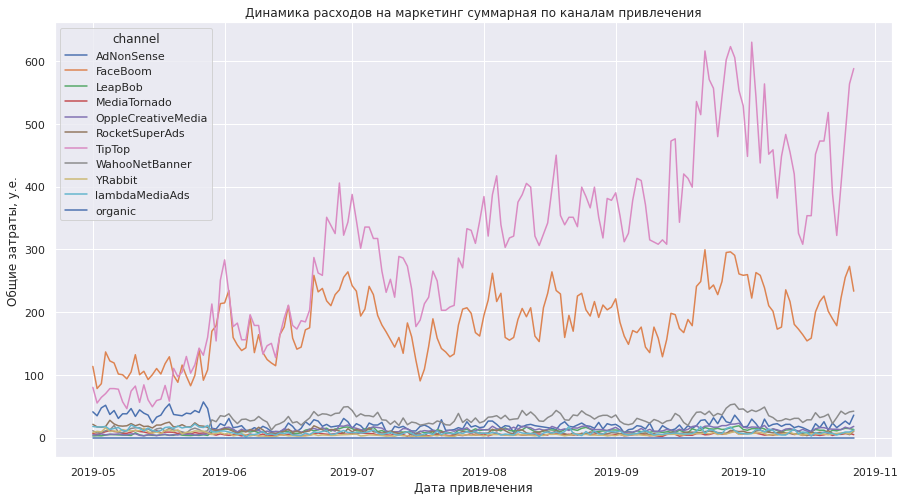

'Общая сумма затрат на маркетинг по всем рекламным каналам, у.е.'

105497.29999999999

In [23]:
# строим график динамики суммарных расходов (всего) на маркетинг по каналам привлечения/по времени
profiles.pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='sum'
).plot(grid=True, figsize=(15, 8))
plt.ylabel('Общие затраты, у.е.')
plt.xlabel('Дата привлечения')
plt.title('Динамика расходов на маркетинг суммарная по каналам привлечения')
plt.show()
display('Общая сумма затрат на маркетинг по всем рекламным каналам, у.е.', profiles['acquisition_cost'].sum())

Видим, что больше всего затрат на привлечение пользователей приходится на каналы Tip Top и FaceBoom. Общие затраты на маркетинг - 105 497,29 условных единиц. Посмотрим что со стоимостью  привлечения одного клиента по каналам и в среднем на весь проект.

#### Расчет и визуализация САС по каналам привлечения.

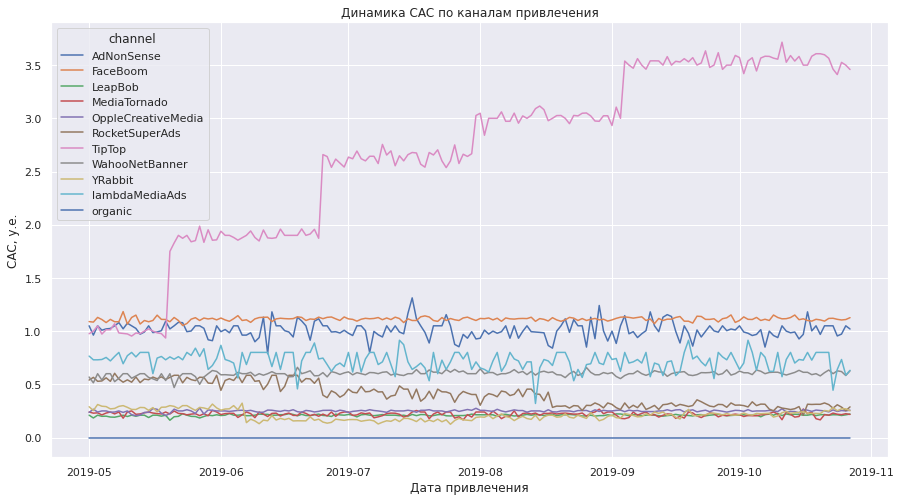

'Средний САС для всего проекта, у.е.'

0.7032778251826568

In [24]:
# # строим график динамики CAC по каналам привлечения/по времени
profiles.pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(15, 8))
plt.ylabel('CAC, у.е.')
plt.xlabel('Дата привлечения')
plt.title('Динамика CAC по каналам привлечения')
plt.show()
display('Средний САС для всего проекта, у.е.', profiles['acquisition_cost'].mean())

Видим, что САС для источника TipTop высокий(доходит до 3,5 у.е.), выбивается, а среднее значение САС общее - 0,70 у.е. 
Проверим по describe распределение затрат на рекламу на одного пользователя.

In [25]:
display(profiles['acquisition_cost'].describe())

count   150,008.00
mean          0.70
std           0.95
min           0.00
25%           0.00
50%           0.25
75%           1.11
max           3.72
Name: acquisition_cost, dtype: float64

Вот и нашли причину. Минимум и 25% - равны нулю. А максимум - 3,72 у.е. Огранические пользователи могут влиять на общий показатель по затратам привлечения пользователей. Исключим их и еще раз проверим САС.

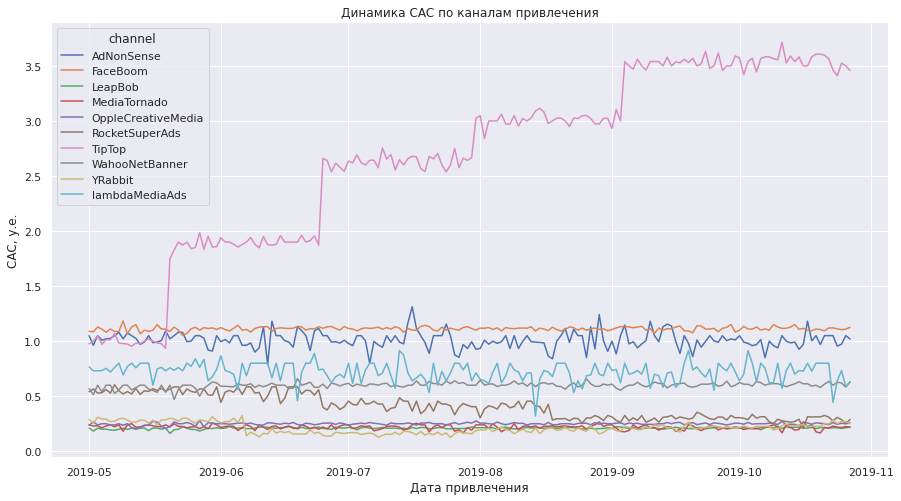

'Средний САС для всего проекта, у.е.'

1.1274813239427588

In [26]:
profiles_new = profiles.query('channel != "organic"')
profiles_new.pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(15, 8))
plt.ylabel('CAC, у.е.')
plt.xlabel('Дата привлечения')
plt.title('Динамика CAC по каналам привлечения')
plt.show()
display('Средний САС для всего проекта, у.е.', profiles_new['acquisition_cost'].mean())

График не изменился, а вот средние затраты САС выросли и составляют - 1,27 у.е. Значит в дальнейшем при анализе будем применять данные без учета органических пользователей (profiles_new).

In [27]:
# построим таблицу распределения общих затрат на привлечение пользователей и САС (стоимости привлечения одного пользователя)
# по источникам привлечения
channel_costs = profiles_new.groupby('channel').agg({'user_id': 'nunique', 'acquisition_cost':['sum', 'mean']})
channel_costs.columns = ['Пользователи', 'Общие затраты', 'САС']
channel_costs = channel_costs.sort_values(by='САС', ascending=False).reset_index()
display(channel_costs)

,channel,Пользователи,Общие затраты,САС
0,TipTop,19561,"54,751.30",2.80
1,FaceBoom,29144,"32,445.60",1.11
2,AdNonSense,3880,"3,911.25",1.01
3,lambdaMediaAds,2149,"1,557.60",0.72
4,WahooNetBanner,8553,"5,151.00",0.60
5,RocketSuperAds,4448,"1,833.00",0.41
6,OppleCreativeMedia,8605,"2,151.25",0.25
7,YRabbit,4312,944.22,0.22
8,MediaTornado,4364,954.48,0.22
9,LeapBob,8553,"1,797.60",0.21


#### Вывод

Исходя из расчета и графиков суммарной стоимости привлечения пользователей и САС по источникам привлечения можно прийти к следующим промежуточным выводам: 
1. Суммарные затраты самые высокие на рекламный источник TipTop (54 751,3 у.е.), также средние затраты на привлечение одного пользователя (САС) по этому источнику (2,8 у.е.) превышают затраты САС на все иные рекламные источники в 2 и более раза. Но и количество пользователей привлеченных рекламным источником TipTop высокое (19561), превышает в 2-4 раза количество пользователей, привлеченных посредством других источников, за исключением рекламного источника FaceBoom. Также затраты на привлечение пользователей посредством рекламного источника TipTop увеличиваются ежемесячно, САС увеличивается ежемесячно примерно  на 0,5 у.е.
2. Привлекают внимание затраты на рекламный источник FaceBoom. Среднее САС - 1,1 у.е., общие затраты 32 445,6 у.е., при общем количестве привлеченных пользователей - 29 144.
3. Среднее САС по остальным рекламным источникам распределено более равномерно, колеблется от 0,21 у.е. до 1,01 у.е. Количество же привлеченных пользователей по всем остальным источникам от общего числа пользователей составляет около 50%.
4. Следует проанализиовать окупаемость, обратив особое внимание на такие рекламные источники как TipTop и FaceBoom.

### Оценка окупаемости рекламы для привлечения пользователей



#### Анализ общей окупаемости рекламы.

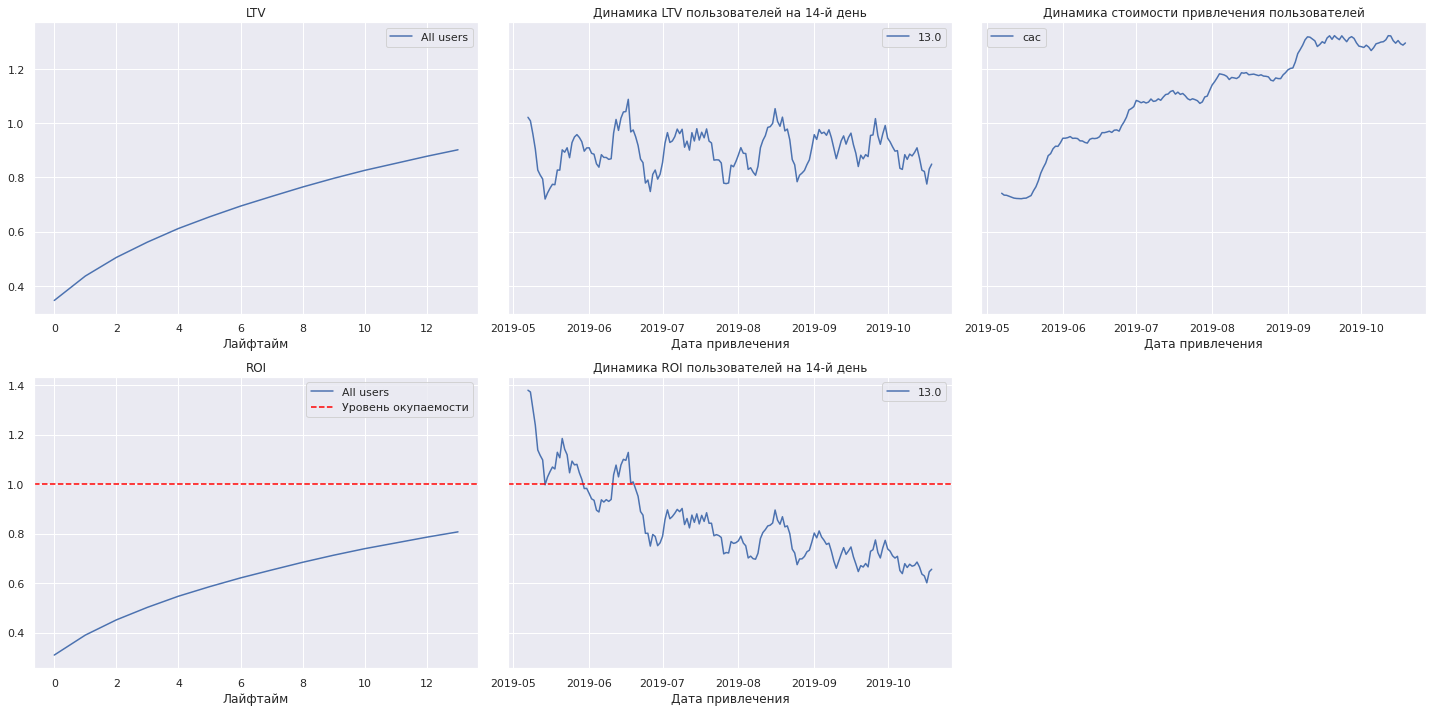

In [28]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_new, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

#### Вывод

Реклама не окупается. ROI в районе 80%. Обращает на себя внимание постепенное падение ROI на 14-й день.
CAC увеличивается. Возможно, дело в увеличении рекламного бюджета.
На LTV влияет сезонный фактор, LTV относительно стабилен. Значит, дело не в ухудшении качества пользователей.
Чтобы разобраться в причинах, пройдём по всем доступным характеристикам пользователей — стране, источнику и устройству первого посещения.

#### Анализ окупаемости рекламы с разбивкой по устройствам

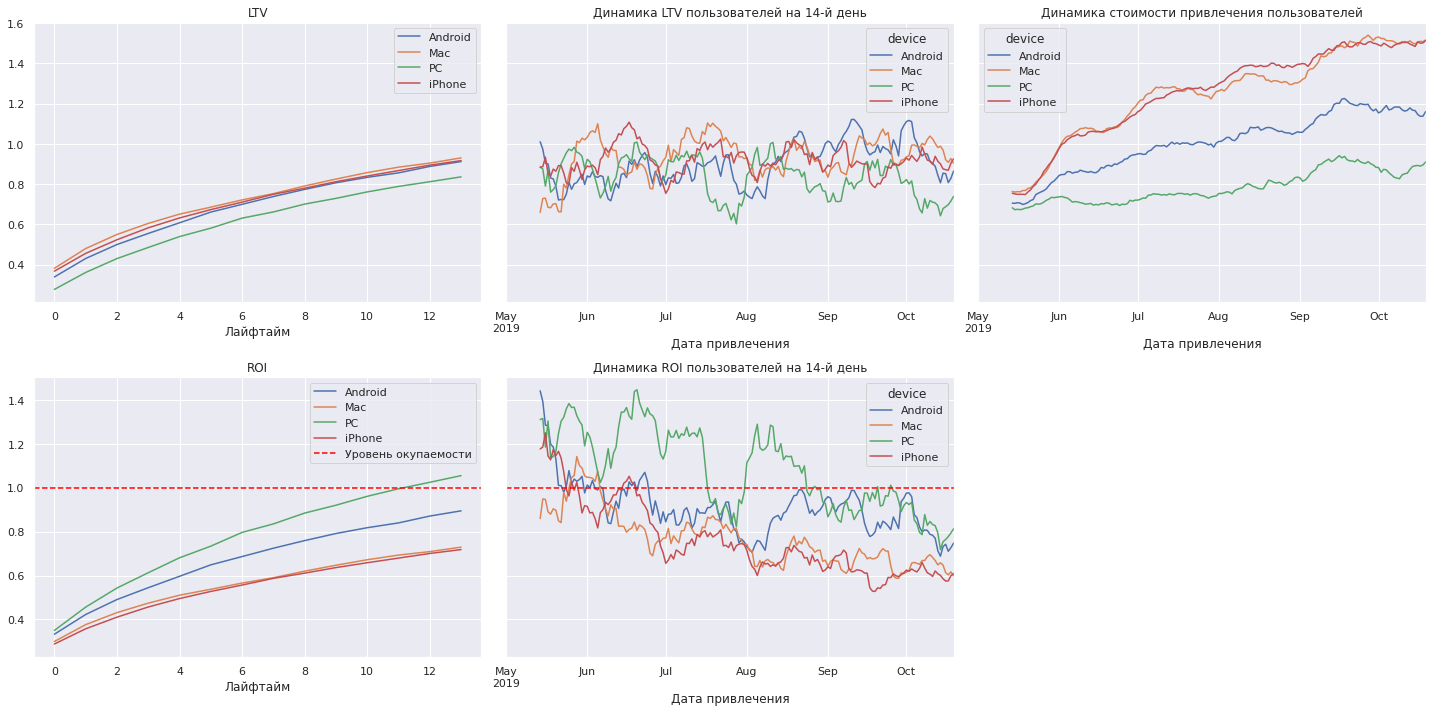

In [29]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_new, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

#### Вывод

Пользователи PC окупаются, а вот владельцы iPhone, Mac, Android — нет. Динамика ROI на 14-й день снижается по всем устройствам неравномерно: ROI на 14-й день по устройствам iPhone, Mac, Android - стабильно ниже окупаемости.

#### Анализ окупаемости рекламы с разбивкой по странам

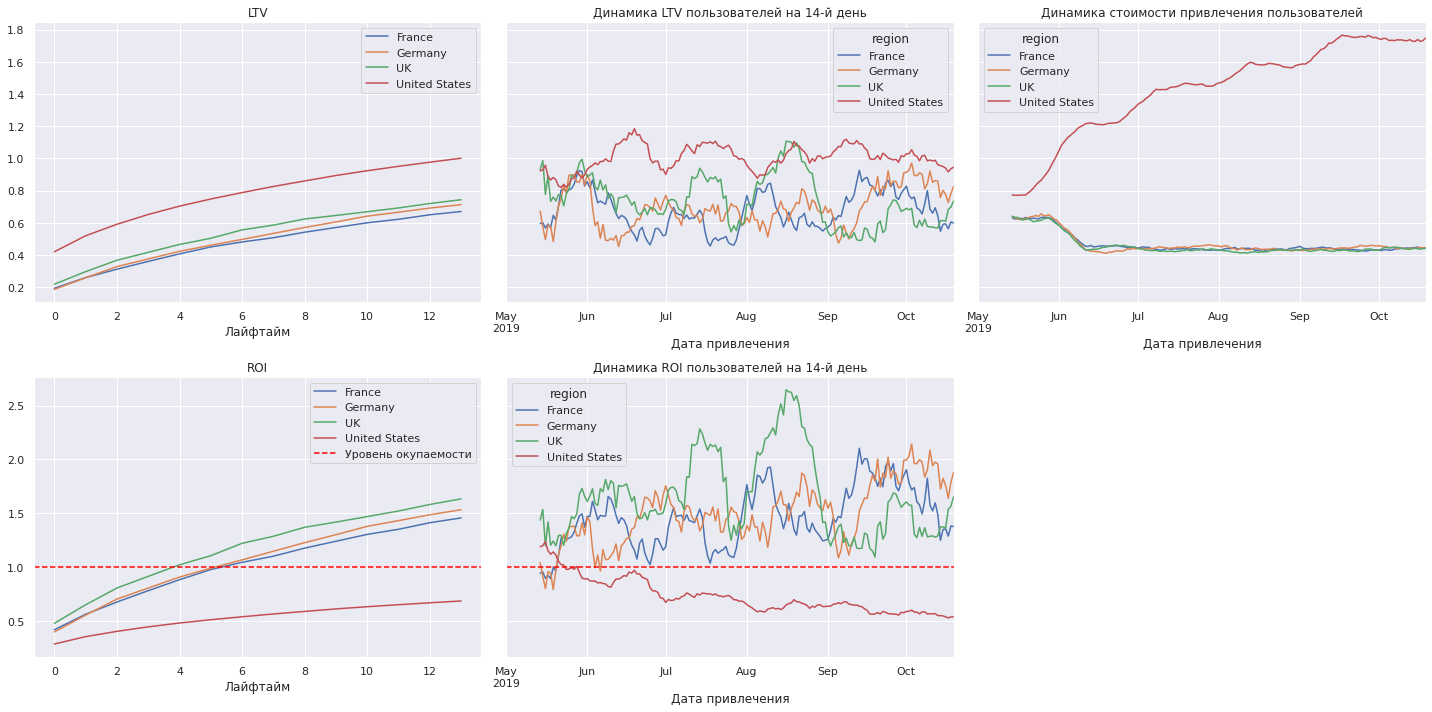

In [30]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_new, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

#### Вывод

Ух ты! Как интересно. Похоже мы нашли источник нашего беспокойства:) Регион United States не окупается, затраты на привлечение пользователей несоразмерно высоки. И проверим все же еще и окупаемость по рекламным каналам. Позже вернемся к этому интересному региону:) Остальные регионы дают окупаемость.

#### Анализ окупаемости рекламы с разбивкой по рекламным каналам

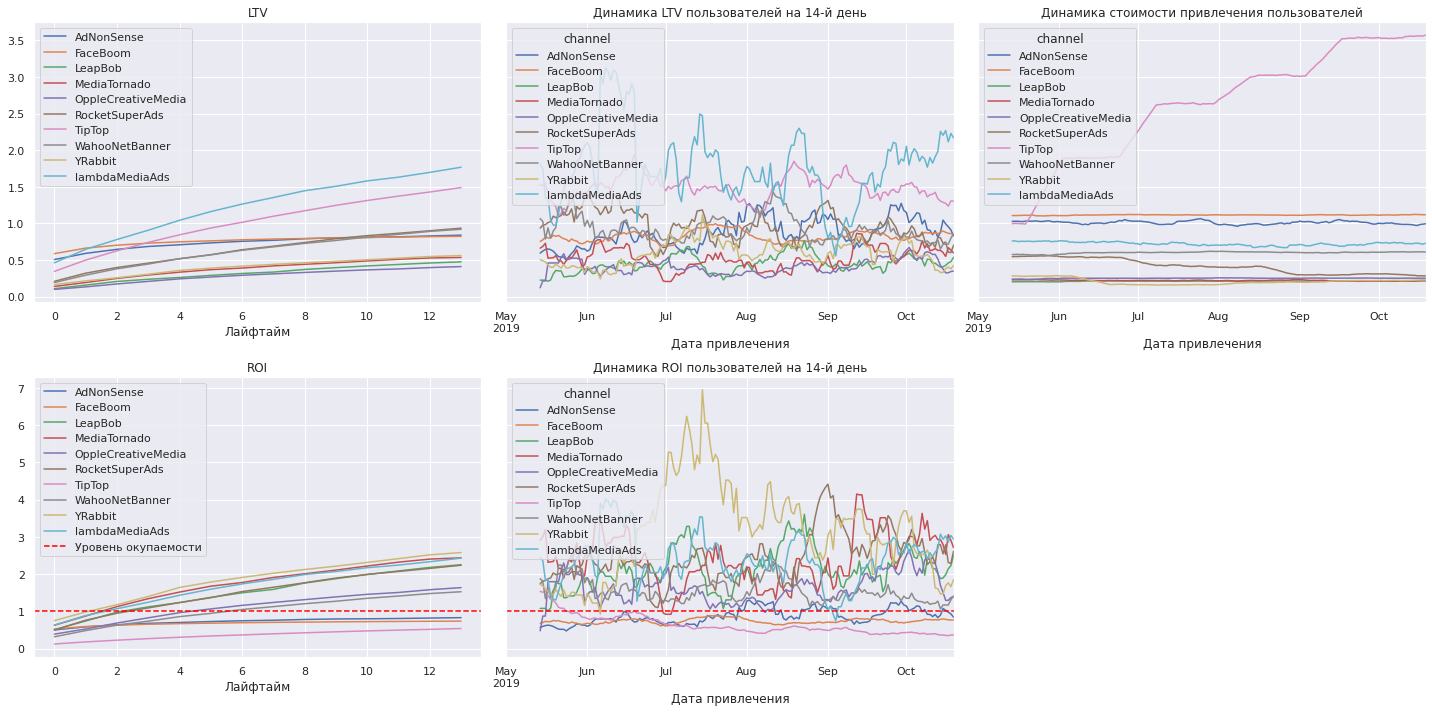

In [31]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_new, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Нет окупаемости по трем каналам: FaceBoom, TipTop, AdNonSense. Расссотрим их по одтельности более детально.

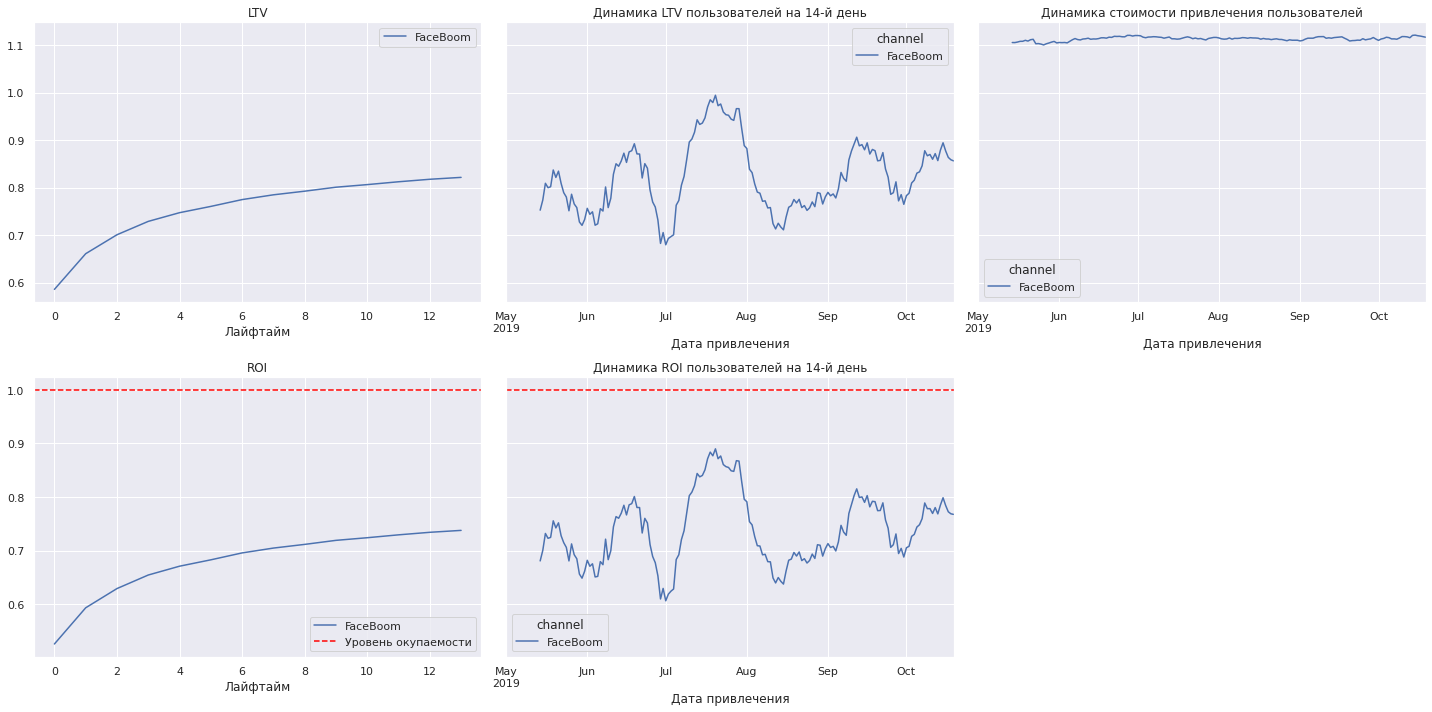

In [32]:
# так как плохо видим на графике окупаемость по каналу FaceBoom,но САС по нему высокий, проверим отдельно его
#выведем отдельно графики окупаемости по этому рекламному каналу
dimensions = ['channel']
profiles_faceboom = profiles_new.query('channel=="FaceBoom"')
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_faceboom, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Да, действительно, по каналу FaceBoom, нет окупаемости при высоких затратах на рекламу. Плохо. Дальше мы будем смотреть конверсию и удержание, попробуем найти причину.

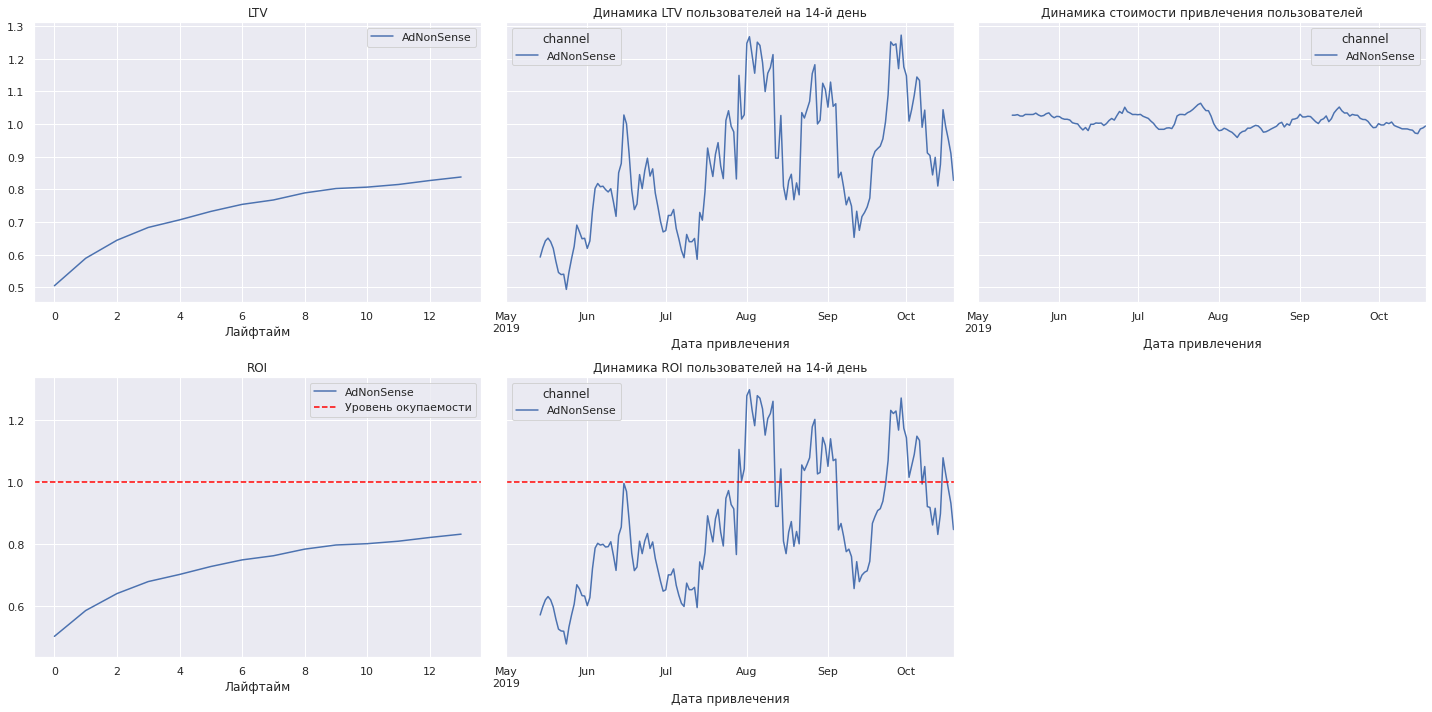

In [33]:
dimensions = ['channel']
profiles_adnonsense = profiles_new.query('channel=="AdNonSense"')
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_adnonsense, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

По рекламному каналу AdNonSense окупаемости общей нет, но при изучении ROI на 14-й день, видим, что в августе и октябре окупаемость поднималась. Вероятно это было связано с какими либо акциями и рекламными компаниями в эти месяцы.

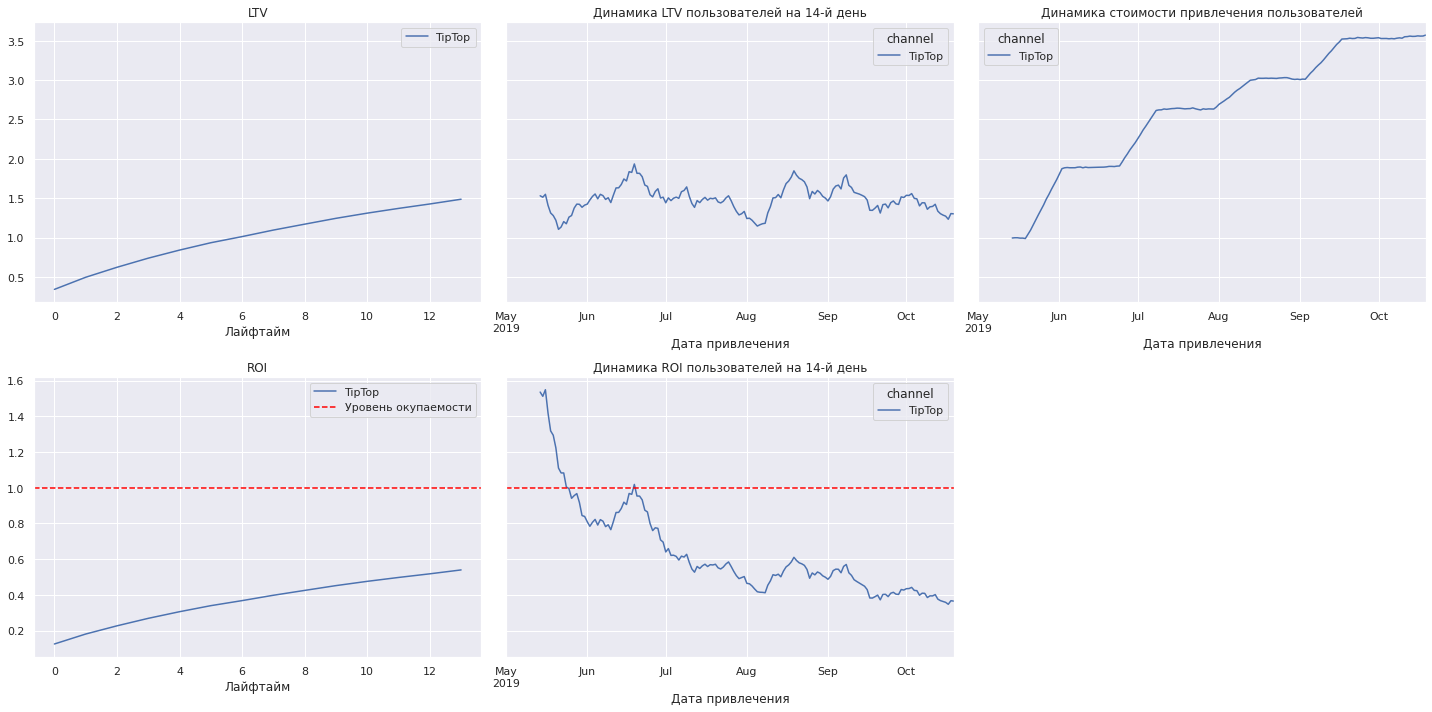

In [34]:
dimensions = ['channel']
profiles_tiptop = profiles_new.query('channel=="TipTop"')
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_tiptop, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

По реклкамному каналу TipTop окупаемость была в мае и пошла вниз с июня при анализе ROI на 14-й день. 

#### Вывод

На предыдущем этапе анализа привлек внимание канал TipTop, и при дополнительной проверке оказалось, что он при самых высоких затратах на привлечение пользователей - не окупается. 

Вернемся к окупаемости по странам.И узнаем, в чём причина: в низкой конверсии или низком удержании.

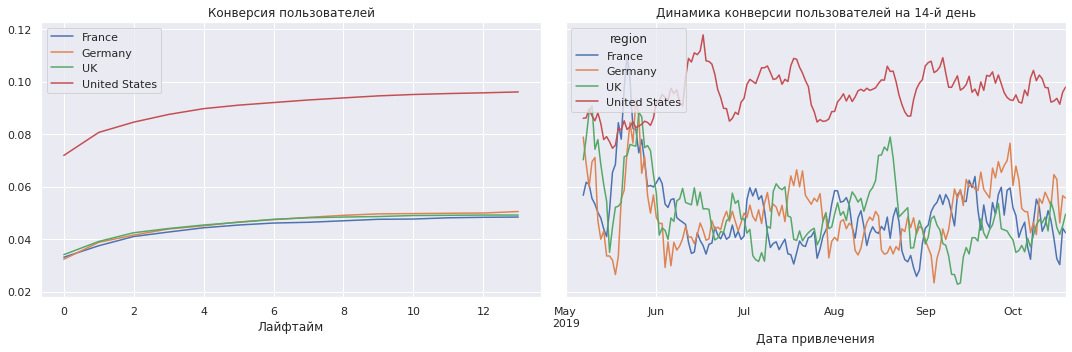

In [35]:
# смотрим конверсию с разбивкой по странам

dimensions = ['region']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_new, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Кривая конверсии плавно растёт от нуля в направлении единицы.
Кривая конверсии не снижается.
В таблице конверсии нет значений, превышающих единицу. На общем фоне выделяется конверсия USA - она превышает конверсии других стран в два раза.

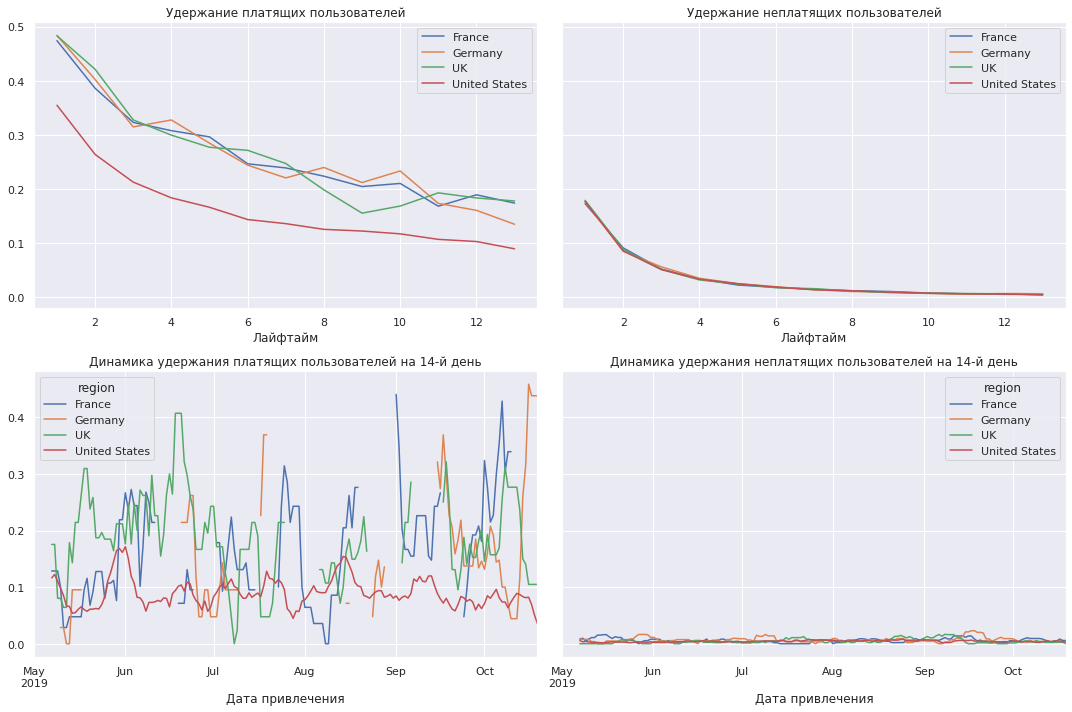

In [36]:
# смотрим удержание с разбивкой по странам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_new, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Вот и причина! Самое низкое удержание из всех регионов платящих пользователей за регионом Unitet States.

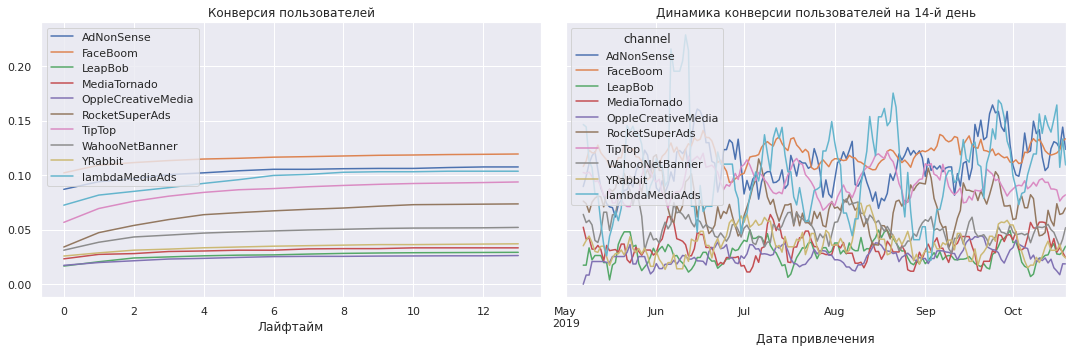

In [37]:
# посмотрим конверсию по рекламным каналам
dimensions = ['channel']
onversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_new, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

С конверсией все более менее стабильно. Проверим удержание по рекламным источникам.

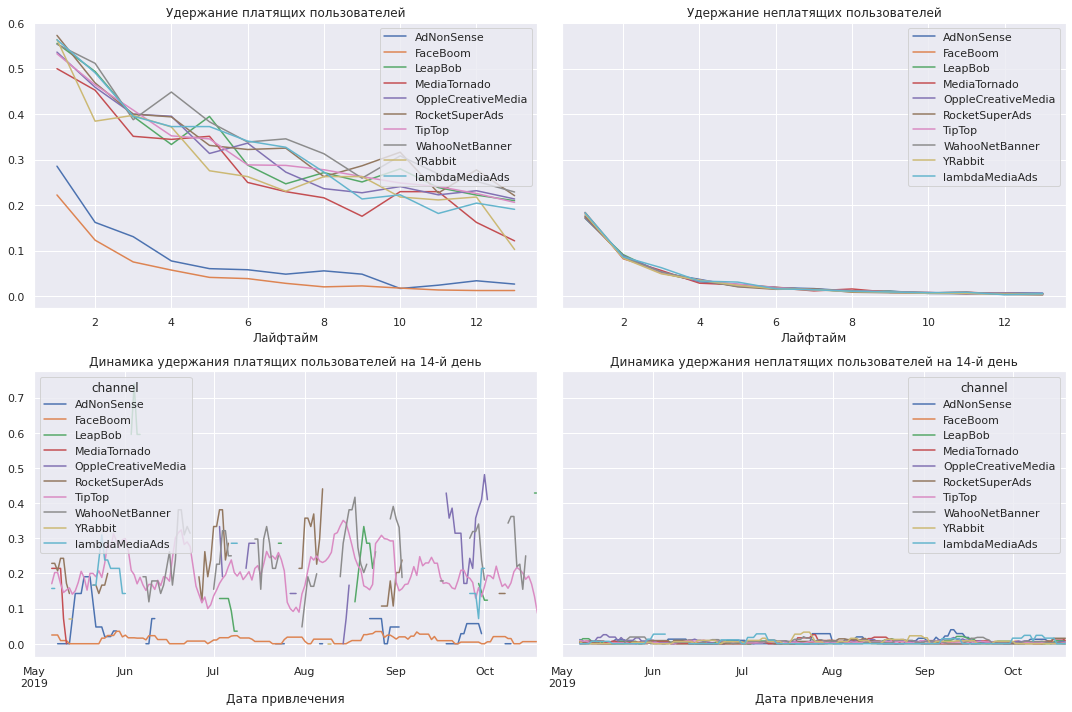

In [38]:
# посмотим удержание по рекламным каналам
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_new, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

 Два рекламных источника: FaceBoom и AdNonSense - имеет явно низкое удержание платящих пользователей.

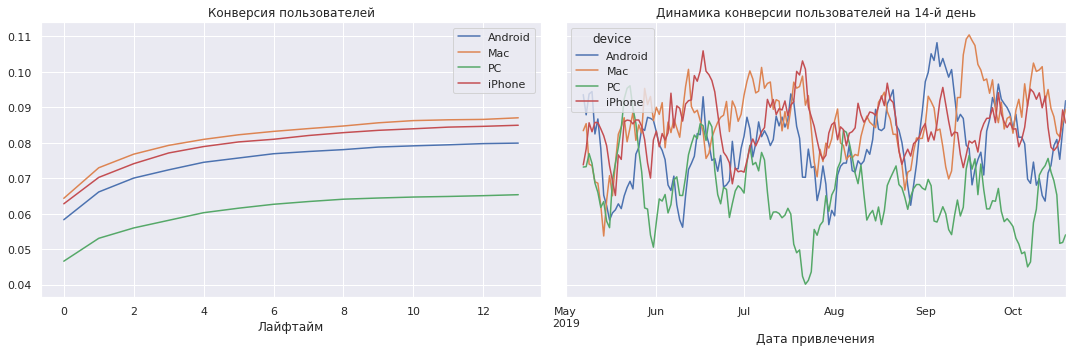

In [39]:
# посмотрим конверсию с разбивкой  по устройствам
dimensions = ['device']

onversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_new, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Самая низкая конверсия с разбивкой по устройствам - это конверсия платящих пользователей устройства PC.

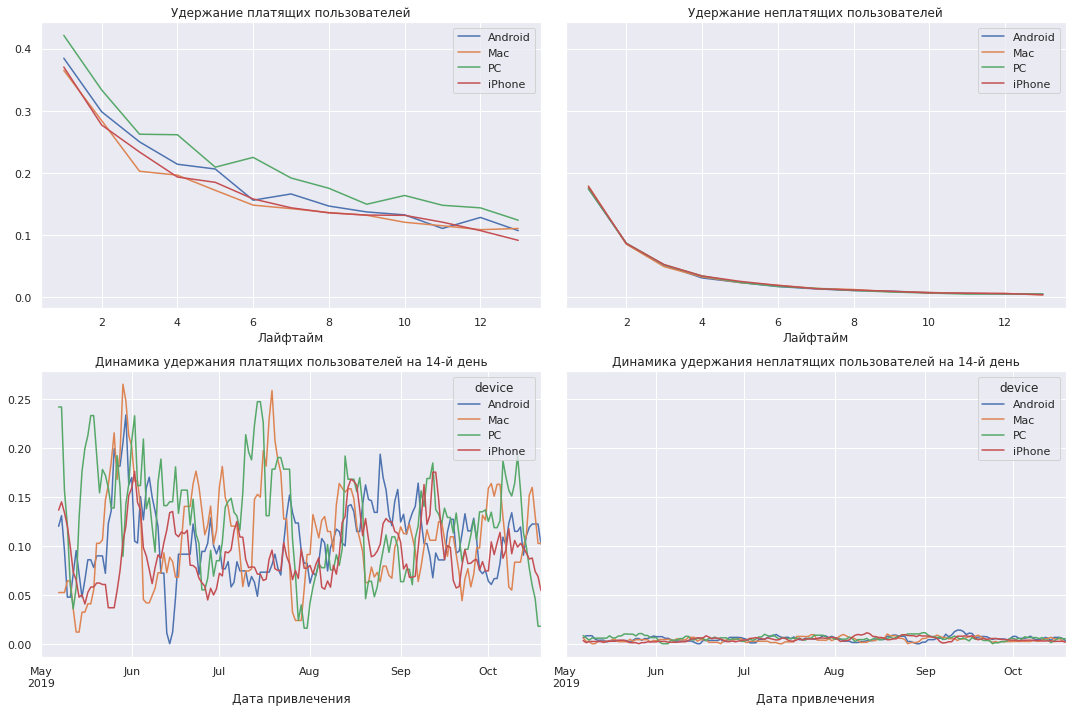

In [40]:
# посмотрим удержание с разбивкой по устройствам
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_new, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 


Удержание по всем устройствам в норме.

### Выводы.



Затраты:

Суммарные затраты самые высокие на рекламный источник TipTop (54 751,3 у.е.), также средние затраты на привлечение одного пользователя (САС) по этому источнику (2,8 у.е.) превышают затраты САС на все иные рекламные источники в 2 и более раза. Но и количество пользователей привлеченных рекламным источником TipTop высокое (19561), превышает в 2-4 раза количество пользователей, привлеченных посредством других источников, за исключением рекламного источника FaceBoom. Также затраты на привлечение пользователей посредством рекламного источника TipTop увеличиваются ежемесячно, САС увеличивается ежемесячно примерно на 0,5 у.е.
Привлекают внимание затраты на рекламный источник FaceBoom. Среднее САС - 1,1 у.е., общие затраты 32 445,6 у.е., при общем количестве привлеченных пользователей - 29 144.
Среднее САС по остальным рекламным источникам распределено более равномерно, колеблется от 0,21 у.е. до 1,01 у.е. Количество же привлеченных пользователей по всем остальным источникам от общего числа пользователей составляет около 50%.
Следует обратить особое внимание на такие рекламные источники как TipTop и FaceBoom.



Окупаемость:

Реклама не окупается. ROI в районе 80%. Обращает на себя внимание постепенное падение ROI на 14-й день. CAC увеличивается. Возможно, дело в увеличении рекламного бюджета. На LTV влияет сезонный фактор, LTV относительно стабилен. Значит, дело не в ухудшении качества пользователей. 



Окупаемость по устройствам:

Пользователи PC окупаются, а вот владельцы iPhone, Mac, Android — нет. Динамика ROI на 14-й день снижается по всем устройствам неравномерно: ROI на 14-й день по устройствам iPhone, Mac, Android - стабильно ниже окупаемости. Самая низкая конверсия с разбивкой по устройствам - это конверсия платящих пользователей устройства PC, но окупаемость по этому устройству есть. Удержание по всем устройствам в норме. Причина отсутствия окупаемости по устройствам скорее всего не связана с техническими ошибками, но рекомендация техническому отделу проверить на наличие технических сбоев при работе пользователей с устройств iPhone, Mac, Android. (как дополнительная рекомендация). 



Окупаемость по регионам:

Регион United States не окупается, затраты на привлечение пользователей несоразмерно высоки. Причина: Самое низкое удержание из всех регионов платящих пользователей за регионом Unitet States.



Окупаемость по рекламным каналам:

При анализе затрат привлек внимание канал TipTop (регион США), и при дополнительной проверке оказалось, что он при самых высоких затратах на привлечение пользователей - не окупается. Причина - очень высокие затраты на данный рекламный источник.

Один из рекламных источников - FaceBoom (регион США) - имеет явно низкое удержание платящих пользователей при высоких затратах на рекламу окупаемость отсутствует.

Эти два рекламных канала имеют регион происхождения США, что и отвечает на вопрос низкой окупаемости по этому региону.


По рекламному каналу AdNonSense (регион Германия) окупаемости общей нет, но при изучении ROI на 14-й день, видим, что в августе и октябре окупаемость поднималась. Вероятно это было связано с какими либо акциями и рекламными компаниями в эти месяцы.


Очень хорошие показатели окупаемости за весь период и на 14-й день, при относительно низкой стоимости привлечения пользователей по рекламным каналам lambdaMediaAds( регион UK), YRabbit (особенно  в июле) и MediaTornado (июнь, сентябрь) - регион США, но количество пользователей привлеченное посредством данных рекламных источников относительно невысокое.




Рекомендации отделу маргетинга.

Нужно провести подробный аудит рекламных источников TipTop, FaceBoom. Данные источники хоть и являются лидерами по количеству привлекаемых пользователей, но этот трафик не окупается. Я бы предложила по итогам аудита уменьшать расходы на данные источники (не отключать их совсем), чтобы вывести окупаемость привлекаемых пользователей в плюс. Также в рекламных каналах FaceBoom, AdNonSense  очень низкое удержание пользователей при отсутствии окупаемости, поэтому, здесь нужно проработать способы для повышения удержания пользователей (программы лояльности, ежедневные предложения,геймификация, премиум статус и т.д.).

Рекламные каналы lambdaMediaAds( регион UK), YRabbit (США) и MediaTornado (США) нужно пробовать масштабировать, но при этом важно сохранить окупаемость привлекаемого трафика. Важно не потерять это качество при росте трафика. YRabbit (США) в июле и MediaTornado в июне, сентябре был всплеск окупаемости. Рекомендую изучить причины такого всплеска и применять в дальнейшем как хороший опыт повышения окупаемости для этих и иных источников.
 Хорошо бы при аудите обратить внимание по рекламному каналу AdNonSense (Германия) какие рекламные акции проходили в августе и октябре (повышалась окупаемость) и применять их в дальнейшем чаще для повышения окупаемости.
 
